TIDAL WAVE PREDICTION 

Source : Pulau Sebesi

Goal dari projek kami adalah untuk memprediksi pasang surut air laut pada hari tertentu, untuk itu dilakukan kembali pengolahan data berikut :

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

Load Data

In [ ]:
data_awal = pd.read_csv('/content/Data 75k.csv')
data_awal.shape

(75978, 2)

In [ ]:
#menampilkan 5 data paling atas
data_awal.head()

,Date,Sensor
0,01/01/2020 23:30:27,0.463
1,01/01/2020 23:31:22,0.462
2,01/01/2020 23:34:29,0.476
3,01/01/2020 23:39:38,0.492
4,01/01/2020 23:44:58,0.496


In [ ]:
data_awal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75978 entries, 0 to 75977
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    75978 non-null  object 
 1   Sensor  75978 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.2+ MB


In [ ]:
#mengubah type Date dari object ke datetime
data_awal['Date'] = pd.to_datetime(data_awal.Date, format='%d/%m/%Y %H:%M:%S')
data_awal.dtypes

Date      datetime64[ns]
Sensor           float64
dtype: object

In [ ]:
data_awal['Date'] = pd.to_datetime(data_awal['Date'])

In [ ]:
print(f"starting date : {str(data_awal['Date'].dt.date.min())}")
print(f"end date : {str(data_awal['Date'].dt.date.max())}")

starting date : 2020-01-01
end date : 2021-12-31


In [ ]:
def dataPreprocessing(dataFrame):
    dataFrame['Date'] = pd.to_datetime(dataFrame['Date']) + dataFrame['hour'].astype('timedelta64[h]')
    dataFrame.drop(columns=['hour'], axis=1, inplace=True)
    return dataFrame

In [ ]:
data_awal.head()

,Date,Sensor
0,2020-01-01 23:30:27,0.463
1,2020-01-01 23:31:22,0.462
2,2020-01-01 23:34:29,0.476
3,2020-01-01 23:39:38,0.492
4,2020-01-01 23:44:58,0.496


ANALYZE THE DATA

In [ ]:
import plotly.express as px

In [ ]:
fig = px.line(data_awal, x='Date', y='Sensor')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
dftest = adfuller(data_awal['Sensor'], autolag = 'AIC')

print('1. ADF  : ',dftest[0])
print('2. P-Value : ',dftest[1])
print('3. Num of Lags : ',dftest[2])
print('4. Num of Observations Used For ADF Refression and Critical Values Calculation : ',dftest[3])
print('5. Critical Values : ')
for key, val in dftest[4].items():
  print('\t',key, ': ', val)

1. ADF  :  -22.729293457661985
2. P-Value :  0.0
3. Num of Lags :  56
4. Num of Observations Used For ADF Refression and Critical Values Calculation :  75921
5. Critical Values : 
	 1% :  -3.4304361358663877
	 5% :  -2.8615780705704017
	 10% :  -2.5667902636556286


Karena P-Value(Probability Value) nya tidak lebih dari 0.5 maka data timeseries bersifat stastioner

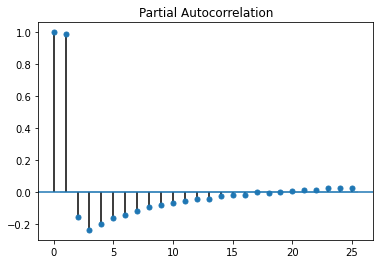

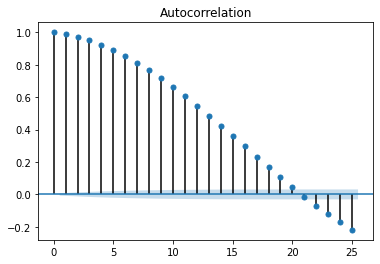

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
pacf=plot_pacf(data_awal['Sensor'],lags=25)
acf=plot_acf(data_awal['Sensor'],lags=25)

Simpan data baru

In [ ]:
data_awal.to_csv('/content/data_75.csv', index=False)

Pengolahan Data - Mengubah bentuk data

In [ ]:
df = pd.read_csv('/content/data_75.csv')
df.head()

,Date,Sensor
0,2020-01-01 23:30:27,0.463
1,2020-01-01 23:31:22,0.462
2,2020-01-01 23:34:29,0.476
3,2020-01-01 23:39:38,0.492
4,2020-01-01 23:44:58,0.496


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.tail()

,Date,Sensor
75973,2021-12-31 08:19:50,1.363
75974,2021-12-31 08:22:58,1.382
75975,2021-12-31 08:36:11,1.410
75976,2021-12-31 08:46:50,1.416
75977,2021-12-31 08:49:02,1.426


Menambahkan kolom baru yaitu : jam, hari, bulan, dan tahun 

In [ ]:
df['Hour'] = pd.DatetimeIndex(df['Date']).hour
df['Day'] = df.Date.dt.day
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df

,Date,Sensor,Hour,Day,Year,Month
0,2020-01-01 23:30:27,0.463,23,1,2020,1
1,2020-01-01 23:31:22,0.462,23,1,2020,1
2,2020-01-01 23:34:29,0.476,23,1,2020,1
3,2020-01-01 23:39:38,0.492,23,1,2020,1
4,2020-01-01 23:44:58,0.496,23,1,2020,1
...,...,...,...,...,...,...
75973,2021-12-31 08:19:50,1.363,8,31,2021,12
75974,2021-12-31 08:22:58,1.382,8,31,2021,12
75975,2021-12-31 08:36:11,1.410,8,31,2021,12
75976,2021-12-31 08:46:50,1.416,8,31,2021,12


In [ ]:
#mengubah order/urutan data
data = df[["Date", "Year", "Month", "Day", "Hour", "Sensor"]]
data

,Date,Year,Month,Day,Hour,Sensor
0,2020-01-01 23:30:27,2020,1,1,23,0.463
1,2020-01-01 23:31:22,2020,1,1,23,0.462
2,2020-01-01 23:34:29,2020,1,1,23,0.476
3,2020-01-01 23:39:38,2020,1,1,23,0.492
4,2020-01-01 23:44:58,2020,1,1,23,0.496
...,...,...,...,...,...,...
75973,2021-12-31 08:19:50,2021,12,31,8,1.363
75974,2021-12-31 08:22:58,2021,12,31,8,1.382
75975,2021-12-31 08:36:11,2021,12,31,8,1.410
75976,2021-12-31 08:46:50,2021,12,31,8,1.416


In [ ]:
#menghapus field Date
del data['Date']

In [ ]:
#Data Akhir
data

,Year,Month,Day,Hour,Sensor
0,2020,1,1,23,0.463
1,2020,1,1,23,0.462
2,2020,1,1,23,0.476
3,2020,1,1,23,0.492
4,2020,1,1,23,0.496
...,...,...,...,...,...
75973,2021,12,31,8,1.363
75974,2021,12,31,8,1.382
75975,2021,12,31,8,1.410
75976,2021,12,31,8,1.416


In [ ]:
#menyimpan data akhir
data.to_csv('/content/data75k.csv', index=False)

LOAD DATA BARU

In [ ]:
data = pd.read_csv('/content/data75k.csv')
data

,Year,Month,Day,Hour,Sensor
0,2020,1,1,23,0.463
1,2020,1,1,23,0.462
2,2020,1,1,23,0.476
3,2020,1,1,23,0.492
4,2020,1,1,23,0.496
...,...,...,...,...,...
75973,2021,12,31,8,1.363
75974,2021,12,31,8,1.382
75975,2021,12,31,8,1.410
75976,2021,12,31,8,1.416


In [ ]:
#memeriksa tipe data
print(data.dtypes)

Year        int64
Month       int64
Day         int64
Hour        int64
Sensor    float64
dtype: object


MODELLING

In [ ]:
X = data.iloc[:, 0:4].values
y = data.iloc[:, -1].values

In [ ]:
#SUPPORT VECTOR REGRESSION
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

SVR()

In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression

lireg = LinearRegression()
lireg = LinearRegression().fit(X, y)

In [ ]:
import matplotlib.pyplot as plt

xtes = data.iloc[:1000, 0:4].values
ytes = data.iloc[:1000, -1].values

reg_pred = regressor.predict(xtes)
lireg_pred = lireg.predict(xtes)


In [ ]:
#Periksa nilai MAE
from sklearn.metrics import mean_absolute_error
mae1 = mean_absolute_error(reg_pred, ytes)
mae2 = mean_absolute_error(lireg_pred, ytes)

print(mae1)
print(mae2)

# a1 = range(len(X))

0.21174222638207532
0.21105915393232233


In [ ]:
#Periksa Nilai Koefisien Determinasi
r_sq = lireg.score(X, y)
print(f"coefficient of determination: {r_sq}")

r_sq2 = regressor.score(X, y)
print(f"coefficient of determination: {r_sq2}")

coefficient of determination: 0.009842305825547903
coefficient of determination: 0.007485523297645291


In [ ]:
# print(f"intercept: {lireg.intercept_}")
# print(f"intercept: {regressor.intercept_}")

# print(f"slope: {lireg.coef_}") #coef_ cuma bisa dipake di linear regression


In [ ]:
#Prediksi dengan data yang ada
y_pred = lireg.predict(X)
print(f"predicted response:\n{y_pred}")

ypred = regressor.predict(X)
print(f"predicted response:\n{ypred}")

predicted response:
[0.88212814 0.88212814 0.88212814 ... 0.97170435 0.97170435 0.97170435]
predicted response:
[0.90053137 0.90053137 0.90053137 ... 0.94942407 0.94942407 0.94942407]


Diketahui : 
skala pasang dimulai dari sensor dengan nilai 0.934 keatas. Sedangkan untuk surut adalah angka dibawahnya

evaluation

In [ ]:
X = np.array([['2020', '8', '25', '11']])
   
prediction = regressor.predict(X)
prediction2 = lireg.predict(X)

print(prediction)
print(prediction2)



[0.93514325]
[0.92973081]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.



In [ ]:
#pake if-else func buat nentuin pasang ato surut
hasil = []
if prediction >= 0.934:
  hasil = "Pasang"
else:
  hasil = "Surut"

print(hasil)

Pasang


sumber : 
- https://realpython.com/linear-regression-in-python/
- https://towardsdatascience.com/support-vector-regression-svr-one-of-the-most-flexible-yet-robust-prediction-algorithms-4d25fbdaca60
- https://michael-fuchs-python.netlify.app/2020/10/19/time-series-analysis-working-with-dates-and-times/
- https://github.com/nachi-hebbar/FB-Prophet-Time-Series-Forecasting
- https://github.com/nachi-hebbar/Time-Series-Forecasting-LSTM

In [ ]:
import pickle

pd.to_pickle(regressor, 'model_regressor.pkl')
pd.to_pickle(lireg, 'model_lireg.pkl')
#pd.to_pickle(persamaan, 'modeldata_linear.pickle')